# Demo code for Diffusion-based Unpaired SR for Fluid Dynamics. In this demo, we provide example code for the **snapshot** Navier-Stokes data.

# **Data preparation**
  - ## Option A (recommended): you can download the prepared datasets from Google Drive by
    ## `` python download_data.py  ``

  - ## Option B: prepare your own datasets.
  - ## First, generate high-fidelity high-resolution (HFHR) datasets (256x256) and low-fidelity low-resolution (LFLR) datasets (32x32), using JAX-CFD.
    - ## This resulting two unpaired HFHR dataset and LFLR dataset for training, and one paired LFLR and HFHR dataset for testing. These datasets should store in the raw_data folder.
    - ## Then prepare the intermidiate datasets HFLR datasets at resolution 128x128, 64x64, 32x32 by downsampling the HFHR dataset using cubic interpolation: 
    - ## ` python prepare_data.py `
    - ## The resulting datasets store in the data folder.
   



   

# The following code show instance of HFHR, HFLR and LFLR data.

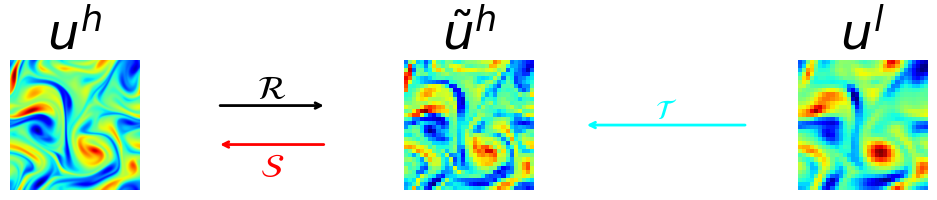

In [1]:
from config.config_ns import *
import numpy as np
import os
cwd = os.getcwd()

with open(Test_data, 'rb') as ss:
    c = np.load(ss)
    cv1 = np.load(ss)

    _ = np.load(ss)
    _ = np.load(ss)
    _ = np.load(ss)

    f = np.load(ss)
    
nrows, bs_plt = 1, 5
fig2, ax = plt.subplots(1, bs_plt, figsize=(bs_plt * 2, nrows * 2))
ax[0].imshow(f[12, ..., 0], cmap=cm.jet)
ax[0].set_title(r'$u^h$', fontsize=36)

ax[1].annotate(
    "", 
    xy=(0.2, 0.35),  # Arrowhead location
    xytext=(0.8, 0.35),  # Arrow tail location
    arrowprops=dict(arrowstyle="->", color='red', lw=2)
)
ax[1].annotate(
    "", 
    xy=(0.8, 0.65),  # Arrowhead location
    xytext=(0.2, 0.65),  # Arrow tail location
    arrowprops=dict(arrowstyle="->", color='black', lw=2)
)
ax[1].text(
    0.5, 0.65,  # X, Y coordinates for the text
    r"$\mathcal{R}$",  # The text to display
    ha='center',  # Horizontal alignment
    va='bottom',  # Vertical alignment
    fontsize=24,  # Font size
)

ax[1].text(
    0.5, 0.05,  # X, Y coordinates for the text
    r"$\mathcal{S}$",  # The text to display
    ha='center',  # Horizontal alignment
    va='bottom',  # Vertical alignment
    fontsize=24,  # Font size
    color='red'
)

ax[2].imshow(cv1[12, ..., 0], cmap=cm.jet)
ax[2].set_title(r'$\tilde{u}^h$', fontsize=36)

ax[3].annotate(
    "", 
    xy=(0.95, 0.5),  # Arrowhead location
    xytext=(0.05, 0.5),  # Arrow tail location
    arrowprops=dict(arrowstyle="<-", color='cyan', lw=2)
)
ax[3].text(
    0.5, 0.5,  # X, Y coordinates for the text
    r"$\mathcal{T}$",  # The text to display
    ha='center',  # Horizontal alignment
    va='bottom',  # Vertical alignment
    fontsize=20,  # Font size
    color='cyan'
)

ax[4].imshow(c[12, ...], cmap=cm.jet)
ax[4].set_title(r'$u^l$', fontsize=36)


for axs in ax.flat:
    axs.set_xticks([])
    axs.set_yticks([])
    axs.axis('off')
    
plt.tight_layout()
fig2.savefig(cwd+'/figs/demo_diagram.png', bbox_inches='tight')
plt.show()

# Next, we provide code for four baseline models for [unpaired] debiasing at LR level.
 
# 1. EDDIB(ours):
   - ## Train two unconditional diffuion models for the HFLR and LFLR datasets, respectively.
   - ## ` python train_gen.py --flag 0` for LFLR dataset
   - ## ` python train_gen.py --flag 1` for HFLR dataset.
# 2. SDEdit:
   - ## Train one unconditional diffuion model for the HFLR dataset. (Note: Retraining is not needed since it was already performed in the previous step; this is provided for completeness.)
   - ## ` python train_gen.py --flag 1` for HFLR dataset
# 3. OT (OTT-JAX)
   - ## ` python train_ot.py `
# 4. NOT (Neural OT)
   - ## ` python train_not.py `
# After running these commands, all four models will be saved in the mdls folder. Next, we compare the enhancement of these models on the LFLR dataset. (We have all four models saved in the mdls folder, you do not need to retrain them).


/Volumes/T7/pycharm/Unpaired_SR_demo/utils/train_vp_utils.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, device=device)
/Volumes/T7/pycharm/Unpaired_SR_demo/utils/train_vp_utils.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, device=device)


Number of function evaluations: 86
Number of function evaluations: 152
Number of function evaluations: 152
(20, 32, 32) (20, 32, 32, 1) (20, 32, 32, 1) (20, 32, 32, 1)


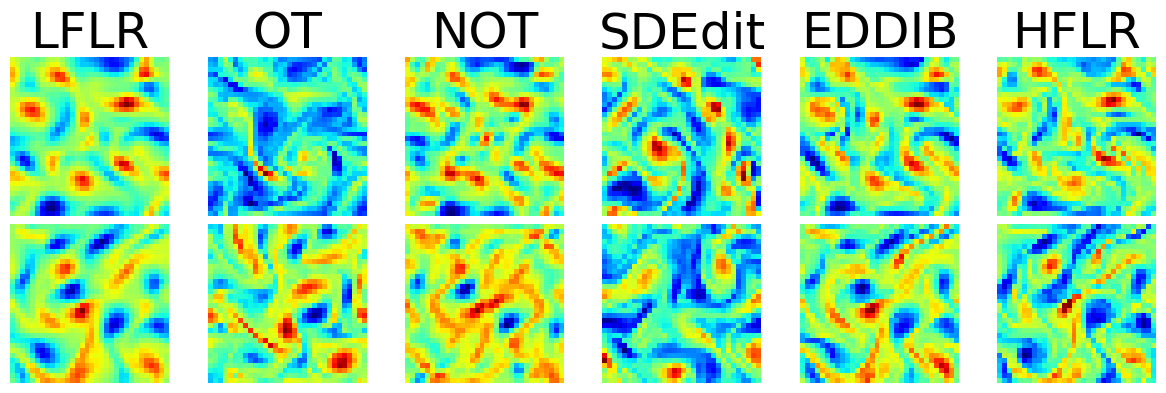

In [2]:
type = 'ns'
sde = 'vp'

if sde == 've':
    from config.model_config_vesde import *
elif sde == 'vp':
    from config.model_config_vpsde import *

if type == 'wave':
    from config.config_wave import *
elif type == 'euler':
    from config.config_euler import *
elif type == 'ns':
    from config.config_ns import *

with open(Test_data, 'rb') as ss:
    c = np.load(ss)
    cv1 = np.load(ss)

import os

load_epoch = 500
mdl_c_name = os.getcwd() + '/mdls/Gen_' + type + '_' + sde + '_flag_0_epoch_' + str(load_epoch) + '_ckpt.pt'
mdl_d_name = os.getcwd() + '/mdls/Gen_' + type + '_' + sde + '_flag_1_epoch_' + str(load_epoch) + '_ckpt.pt'
mdl_T_name = os.getcwd() + '/mdls/NOT_' + type + '_iters_' + str(load_epoch) + '_ckpt.pt'

device = torch.device("cuda" if torch.cuda.is_available() else
                      "mps" if torch.backends.mps.is_available() else
                      "cpu")

mdl_c = torch.load(mdl_c_name, weights_only=False, map_location=device)
mdl_d = torch.load(mdl_d_name, weights_only=False, map_location=device)
mdl_T = torch.load(mdl_T_name, weights_only=False, map_location=device)
mdl_c = mdl_c.to(device)
mdl_d = mdl_d.to(device)
mdl_T = mdl_T.to(device)
mdl_c = mdl_c.eval()
mdl_d = mdl_d.eval()
mdl_T = mdl_T.eval()


metric_name = 'spectrum'
from utils.data_utils import *
### find optimal t1 and t2
t1_ls = np.linspace(0.4, 1, 5)
t2_ls = np.linspace(0.4, 1, 5)
with open(Gen_data, 'rb') as ss:
    ct = np.load(ss)
    cvt = np.load(ss)

batch = 100
c, cv1 = c[-batch:, ...], cv1[-batch:, ...]

# _, t1, t2 = find_inter_t_ode(c, cv1, ode_solver, marginal_prob_fn, get_sde_forward_fn, mdl_c, mdl_d, t1_ls, t2_ls, metric= metric_name, weight=True, max_k = 16, sigma=0.1)
#
# print('optimal t1, t2', t1, t2)

t1, t2 = 0.5, 0.5

from utils.Nueral_solver import *

bs = 20

X = torch.from_numpy(c[:bs, ..., [0]]).float().to(device)
X_np = c[:bs, ..., [0]]

transfer_ddib = transfer_DDIB(ode_solver, marginal_prob_fn, get_sde_forward_fn, mdl_c, mdl_d, X, eps=1e-4, t1=t1, t2=t2)

transfer_sdedit = transfer_sdit(get_perturbed_x, ode_solver, marginal_prob_fn, get_sde_forward_fn, mdl_d, X, eps=1e-4, t1=t1, t2=t2)

transfer_not = transfer_NOT(mdl_T, X, 1)

###### Since ott potentials can not be saved directly, we compute here
ct = ct.reshape(ct.shape[0], -1)
cvt = cvt.reshape(cvt.shape[0], -1)
X_np = X_np.reshape(X_np.shape[0], -1)

transfer_ot = transfer_OT(ct, cvt, X_np)
transfer_ot = transfer_ot.reshape(transfer_ot.shape[0], 32, 32)

print(transfer_ot.shape, transfer_ddib.shape, transfer_sdedit.shape, transfer_not.shape)

fig_name_ins = 'transfer_' + type + '_' + sde + '_t1_' + str(t1) + '_t2_' + str(t2) + '.png'

bsplt = 2
ncols = 6
fig1, ax = plt.subplots(bsplt, ncols, figsize=(2 * ncols, bsplt * 2))
for i in range(bsplt):
    id = i + 8
    ax[i, 0].imshow(c[id, ..., 0], cmap=cm.jet)
    ax[i, 1].imshow(transfer_ot[id, ...], cmap=cm.jet)
    ax[i, 2].imshow(transfer_not[id, ...], cmap=cm.jet)
    ax[i, 3].imshow(transfer_sdedit[id, ..., 0], cmap=cm.jet)
    ax[i, 4].imshow(transfer_ddib[id, ..., 0], cmap=cm.jet)
    ax[i, 5].imshow(cv1[id, ..., 0], cmap=cm.jet)

    ax[0, 0].set_title(r"LFLR", fontsize=36)
    ax[0, 1].set_title(r"OT", fontsize=36)
    ax[0, 2].set_title(r"NOT", fontsize=36)
    ax[0, 3].set_title(r"SDEdit", fontsize=36)
    ax[0, 4].set_title(r"EDDIB", fontsize=36)
    ax[0, 5].set_title('HFLR', fontsize=36)

for axs in ax.flat:
    axs.set_xticks([])
    axs.set_yticks([])
    axs.axis('off')

plt.tight_layout()
plt.savefig(fig_name_ins, bbox_inches='tight')
plt.show()

# Now we provide code for cascaded SR3, that's to train three conditional diffusion models for the HFLR datasets, respectively.
   - ## ` python train_sup.py --flag 0` for SR from 32x32 to 64x64
   - ## ` python train_sup.py --flag 1` for SR from 64x64 to 128x128
   - ## ` python train_sup.py --flag 2` for SR from 128x128 to 256x256

# Comparison of Baseline Methods for **Unpaired** SR (Snapshot Data).
## Inference:
  ## `` python Bridge.py ``
## The results are saved automatically, and we then compare the performance of these five baseline methods.

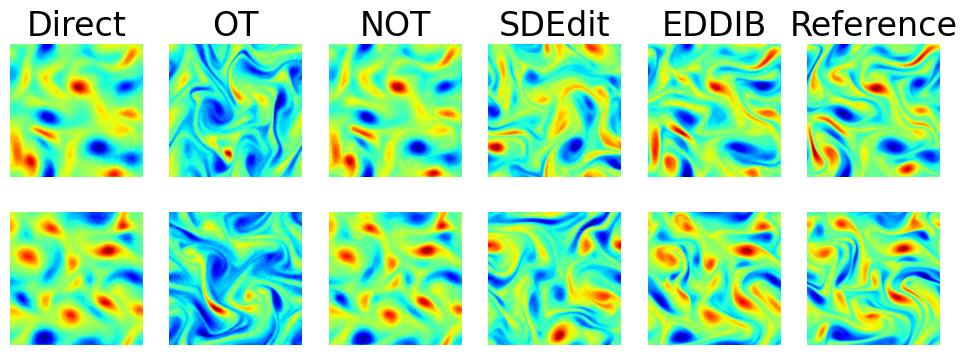

In [3]:
### load data
type = 'ns'
sde = 'vp'
samp = 'pc'

# type = 'euler'
# sde = 'vp'
# samp = 'ode'
T = 0.5
bs = 16

cwd = os.getcwd()

fig_name = cwd + '/figs/Plot_' + type + 'comp_error.png'
fig_name_ins = cwd + '/figs/Plot_' + type + 'comp_ins.png'
fig_name_spectral = cwd + '/figs/Plot_' + type + 'comp_spectral.png'

npy_name = 'Results_type_' + type + '_sde_' + sde + '_sampler_' + samp + '_T_' + num2str_deciaml(T) + '_bs_' + str(bs) + '.npy'

OT_npy_name = 'Results_OT_type_' + type + '_sampler_' + samp + '_bs_' + str(bs) + '.npy'

with open(npy_name, 'rb') as ss:
    c = np.load(ss)

    ddib_pd_32= np.load(ss)
    ddib_pd_64= np.load(ss)
    ddib_pd_128= np.load(ss)
    ddib_pd_256= np.load(ss)

    sdit_pd_32= np.load(ss)
    sdit_pd_64= np.load(ss)
    sdit_pd_128= np.load(ss)
    sdit_pd_256= np.load(ss)

    not_pd_32= np.load(ss)
    not_pd_64= np.load(ss)
    not_pd_128= np.load(ss)
    not_pd_256= np.load(ss)

    direct_pd_64= np.load(ss)
    direct_pd_128= np.load(ss)
    direct_pd_256= np.load(ss)

    f= np.load(ss)

with open(OT_npy_name, 'rb') as ss:
    c = np.load(ss)

    ot_pd_32= np.load(ss)
    ot_pd_64= np.load(ss)
    ot_pd_128= np.load(ss)
    ot_pd_256= np.load(ss)

    f= np.load(ss)
    
ref = f[:bs, ...]

nrows, bs_plt = 6, 2
fig2, ax = plt.subplots(bs_plt, nrows, figsize=(nrows * 2, bs_plt * 2))
for i in range(bs_plt):
    id = i + 7
    ax[i, 0].imshow(direct_pd_256[id, ..., 0], cmap='jet')
    ax[i, 1].imshow(ot_pd_256[id, ..., 0], cmap='jet')
    ax[i, 2].imshow(not_pd_256[id, ..., 0], cmap='jet')
    ax[i, 3].imshow(sdit_pd_256[id, ..., 0], cmap='jet')
    ax[i, 4].imshow(ddib_pd_256[id, ..., 0], cmap='jet')
    ax[i, 5].imshow(ref[id, ..., 0], cmap='jet')

    ax[0, 0].set_title('Direct', fontsize=24)
    ax[0, 1].set_title('OT', fontsize=24)
    ax[0, 2].set_title('NOT', fontsize=24)
    ax[0, 3].set_title('SDEdit', fontsize=24)
    ax[0, 4].set_title('EDDIB', fontsize=24)
    ax[0, 5].set_title('Reference', fontsize=24)

    for axs in ax.flat:
        axs.set_xticks([])
        axs.set_yticks([])
        axs.axis('off')
        
plt.show() 
fig2.savefig(fig_name_ins, bbox_inches='tight')

# Error Comparison: Unpaired SR Results vs. Reference
In the following part, we compare the performance of five unpaired super-resolution (SR) methods against the reference data. We evaluate the results using four metrics:

---
- **RMSE (Root Mean Square Error)**
- **TVD (Total Variation Distance)**
- **MELRu**
- **MELRw**
---


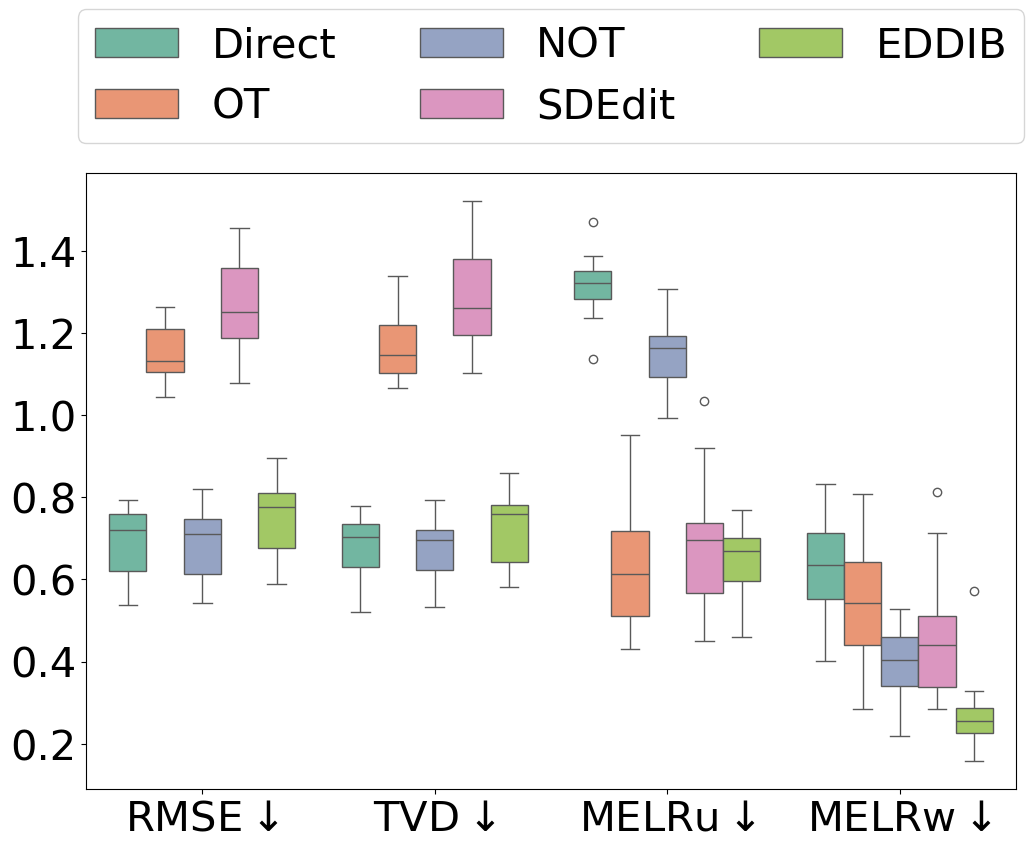

In [4]:
max_freq = 60
from utils.data_utils import *
ddib_pd_tvd_vec = compute_TVD_vector(ddib_pd_256, ref)
ddib_pd_rmse_vec = get_relative_l2_vector(ddib_pd_256, ref)
ddib_pd_melru_vec, ddib_pd_melrw_vec = get_MELR_vector(ddib_pd_256, ref, max_k=max_freq)

sdit_pd_tvd_vec = compute_TVD_vector(sdit_pd_256, ref)
sdit_pd_rmse_vec = get_relative_l2_vector(sdit_pd_256, ref)
sdit_pd_melru_vec, sdit_pd_melrw_vec = get_MELR_vector(sdit_pd_256, ref, max_k=max_freq)

ot_pd_tvd_vec = compute_TVD_vector(ot_pd_256, ref)
ot_pd_rmse_vec = get_relative_l2_vector(ot_pd_256, ref)
ot_pd_melru_vec, ot_pd_melrw_vec = get_MELR_vector(ot_pd_256, ref, max_k=max_freq)


not_pd_tvd_vec = compute_TVD_vector(not_pd_256, ref)
not_pd_rmse_vec = get_relative_l2_vector(not_pd_256, ref)
not_pd_melru_vec, not_pd_melrw_vec = get_MELR_vector(not_pd_256, ref, max_k=max_freq)

direct_pd_tvd_vec = compute_TVD_vector(direct_pd_256, ref)
direct_pd_rmse_vec = get_relative_l2_vector(direct_pd_256, ref)
direct_pd_melru_vec, direct_pd_melrw_vec = get_MELR_vector(direct_pd_256, ref, max_k=max_freq)


import pandas as pdas
import numpy as np
import seaborn as sns

mulp = 1

# Flatten the vectors into a single list
values = np.concatenate([
    direct_pd_rmse_vec, direct_pd_tvd_vec, direct_pd_melru_vec*mulp, direct_pd_melrw_vec,
    ot_pd_rmse_vec, ot_pd_tvd_vec, ot_pd_melru_vec*mulp, ot_pd_melrw_vec,
    not_pd_rmse_vec, not_pd_tvd_vec, not_pd_melru_vec*mulp, not_pd_melrw_vec,
    sdit_pd_rmse_vec, sdit_pd_tvd_vec, sdit_pd_melru_vec*mulp, sdit_pd_melrw_vec,
    ddib_pd_rmse_vec, ddib_pd_tvd_vec, ddib_pd_melru_vec*mulp, ddib_pd_melrw_vec,
])

# Repeat the class and metric labels appropriately
classes = (["Direct"] * bs*4 + ["OT"] * bs*4 + ["NOT"] * bs*4 + ["SDEdit"] * bs*4 + ["EDDIB"] * bs*4)
metrics = ([r'RMSE$\downarrow$'] * bs + [r'TVD$\downarrow$'] * bs + [r'MELRu$\downarrow$'] * bs + [r'MELRw$\downarrow$'] * bs) * 5

# Create the DataFrame
data = {
    "Class": classes,
    "Metric": metrics,
    "Value": values
}

df = pdas.DataFrame(data)

fig = plt.figure(figsize=(12, 8))
sns.boxplot(
    x="Metric",
    y="Value",
    hue="Class",
    data=df,
    palette="Set2",
    width=0.8
)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, fontsize=30)  # Adjust position and layout

# Customize the plot
#plt.title("Comparison Across Methods and Metrics", fontsize=28)
plt.xlabel("")
plt.ylabel("")
#plt.legend(title="Method", fontsize=24, title_fontsize=28)
#plt.legend(fontsize=38)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.savefig(fig_name, bbox_inches='tight')
plt.show()

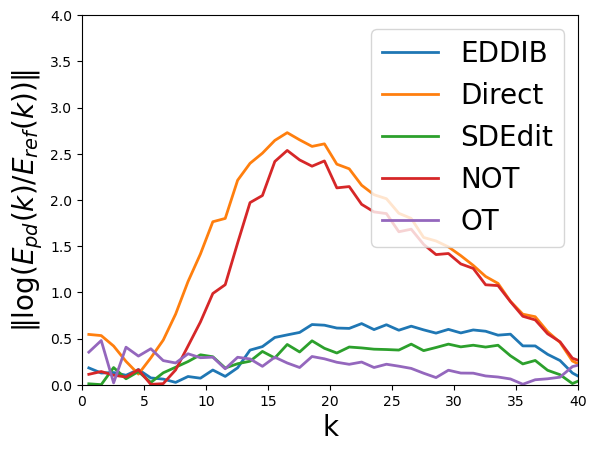

In [5]:
RMSE_ddib, MMD_ddib, TVD_ddib, melr_u_ddib, melr_w_ddib, k_vec, log_ddib = compute_all_error(ddib_pd_256, ref, max_k=max_freq)
RMSE_direct, MMD_direct, TVD_direct, melr_u_direct, melr_w_direct, k_vec, log_direct = compute_all_error(direct_pd_256, ref,max_k=max_freq)
RMSE_sdit, MMD_sdit, TVD_sdit, melr_u_sdit, melr_w_sdit, k_vec, log_sdit = compute_all_error(sdit_pd_256, ref, max_k=max_freq)
RMSE_not, MMD_not, TVD_not, melr_u_not, melr_w_not, k_vec, log_not = compute_all_error(not_pd_256, ref, max_k=max_freq)
RMSE_ot, MMD_ot, TVD_ot, melr_u_ot, melr_w_ot, k_vec, log_ot = compute_all_error(ot_pd_256, ref, max_k=max_freq)

max_freq=40
plt.figure(3)
plt.plot(k_vec, log_ddib, linewidth=2, label='EDDIB')
plt.plot(k_vec, log_direct, linewidth=2, label='Direct')
plt.plot(k_vec, log_sdit, linewidth=2, label='SDEdit')
plt.plot(k_vec, log_not, linewidth=2, label='NOT')
plt.plot(k_vec, log_ot, linewidth=2, label='OT')
plt.legend(loc='upper right', fontsize=20)
plt.xlabel('k', fontsize='20')
plt.ylabel(r'$\| \log (E_{pd}(k)/E_{ref}(k)) \|$', fontsize='20')
plt.xlim([0, max_freq])
plt.ylim([0, 4])

plt.savefig(fig_name_spectral, bbox_inches='tight')